In [32]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area[name="Санкт-Петербург"]->.b;
rel(area.b)[name="Приморский район"];
map_to_area -> .a;
way[highway~"^(motorway|trunk|primary|secondary|tertiary|unclassified|living_street|pedestrian|bus_guideway|residential)$"](area.a);
out geom;
relation[highway~"^(motorway|trunk|primary|secondary|tertiary|unclassified|living_street|pedestrian|bus_guideway|residential)$"](area.a);
out geom;
"""

torport = 9050
proxies = {
    'http': "socks5h://localhost:{}".format(torport),
    'https': "socks5h://localhost:{}".format(torport)
}


response = requests.get(overpass_url, 
                        params={'data': overpass_query}, proxies = proxies)
data = response.json()

In [69]:
import json


with open('primorskii_district.txt', 'r') as file:
    data = json.load(file)


In [2]:
import json
with open('centralnii_district.txt', 'r') as file:
    data0 = json.load(file)



In [3]:
import json
with open('vasileostrovskii_district.txt', 'r') as file:
    data1 = json.load(file)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
coords0 = [[] for x in range(len(data0['elements']))]
for i in range(len(data0['elements'])):
    if 'geometry' in data0['elements'][i]:
            for j in range(len(data0['elements'][i]['geometry'])):
                lon = data0['elements'][i]['geometry'][j]['lon']
                lat = data0['elements'][i]['geometry'][j]['lat']
                coords0[i].append((lon, lat))
X = np.array(coords0[0])
plt.figure(num=None, figsize=(30, 30), dpi=50)


for k in range(len(data0['elements'])):
    X = np.array(coords0[k])
    if 'name' in data0['elements'][k]['tags']:
        name = data0['elements'][k]['tags']['name']
    else:
        name = 'empty'
    if len(coords0[k]) > 0:
        #plt.plot(X[:, 0], X[:, 1], '-o', label = name )
        plt.plot(X[:, 0], X[:, 1], '-o')

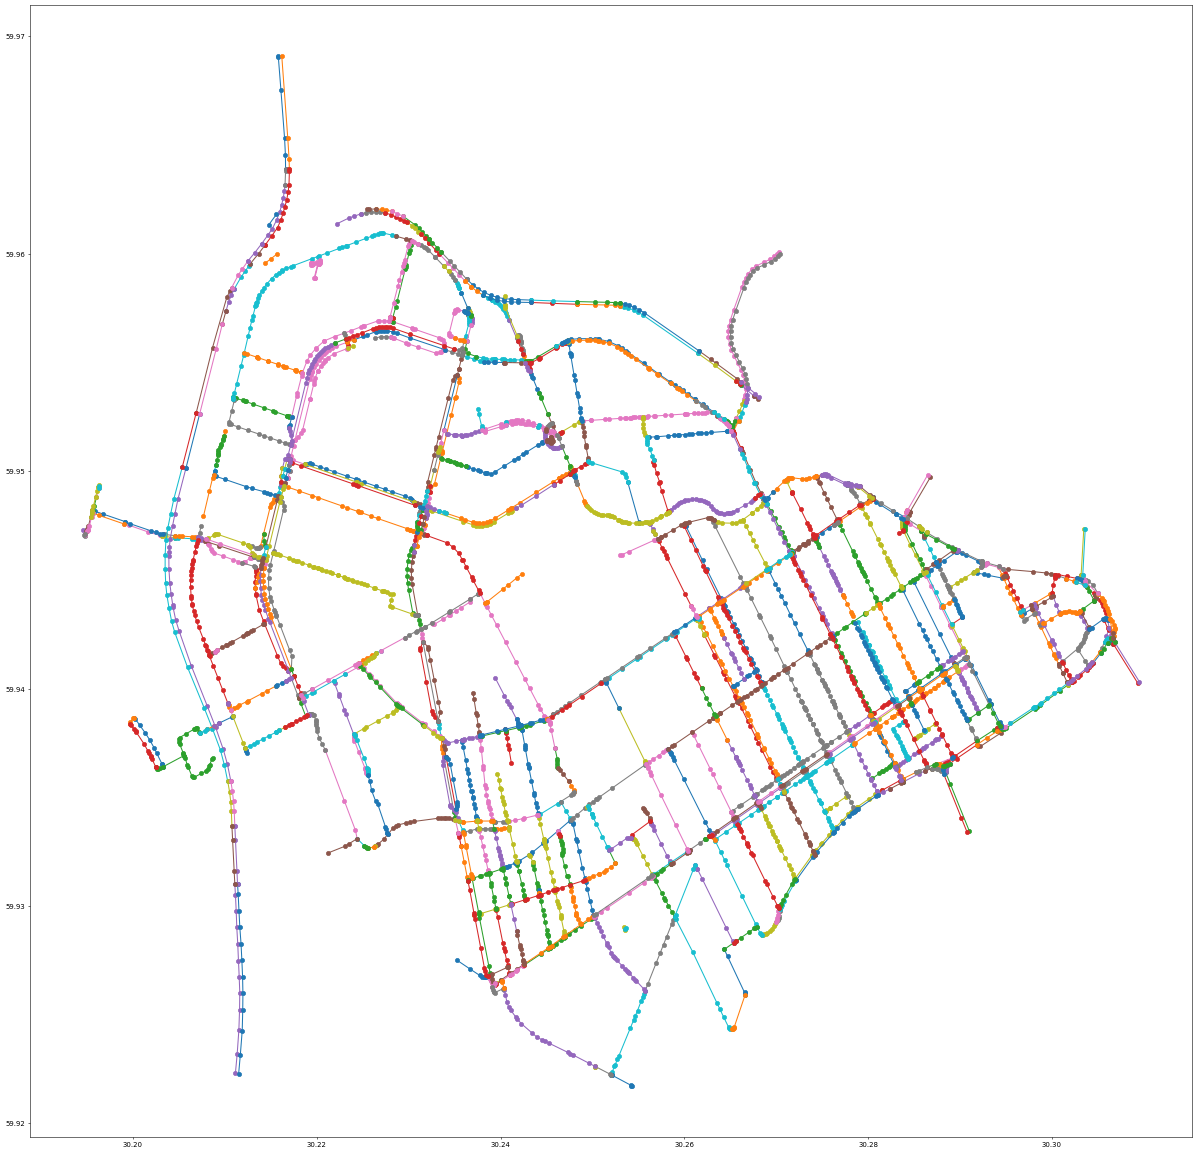

In [5]:
import numpy as np
import matplotlib.pyplot as plt
coords1 = [[] for x in range(len(data1['elements']))]
for i in range(len(data1['elements'])):
    if 'geometry' in data1['elements'][i]:
            for j in range(len(data1['elements'][i]['geometry'])):
                lon = data1['elements'][i]['geometry'][j]['lon']
                lat = data1['elements'][i]['geometry'][j]['lat']
                coords1[i].append((lon, lat))
X = np.array(coords1[0])
plt.figure(num=None, figsize=(30, 30), dpi=50)


for k in range(len(data1['elements'])):
    X = np.array(coords1[k])
    if 'name' in data1['elements'][k]['tags']:
        name = data1['elements'][k]['tags']['name']
    else:
        name = 'empty'
    if len(coords1[k]) > 0:
        #plt.plot(X[:, 0], X[:, 1], '-o', label = name )
        plt.plot(X[:, 0], X[:, 1], '-o')

In [6]:
coords1.extend(coords0)
coords = coords1

No handles with labels found to put in legend.


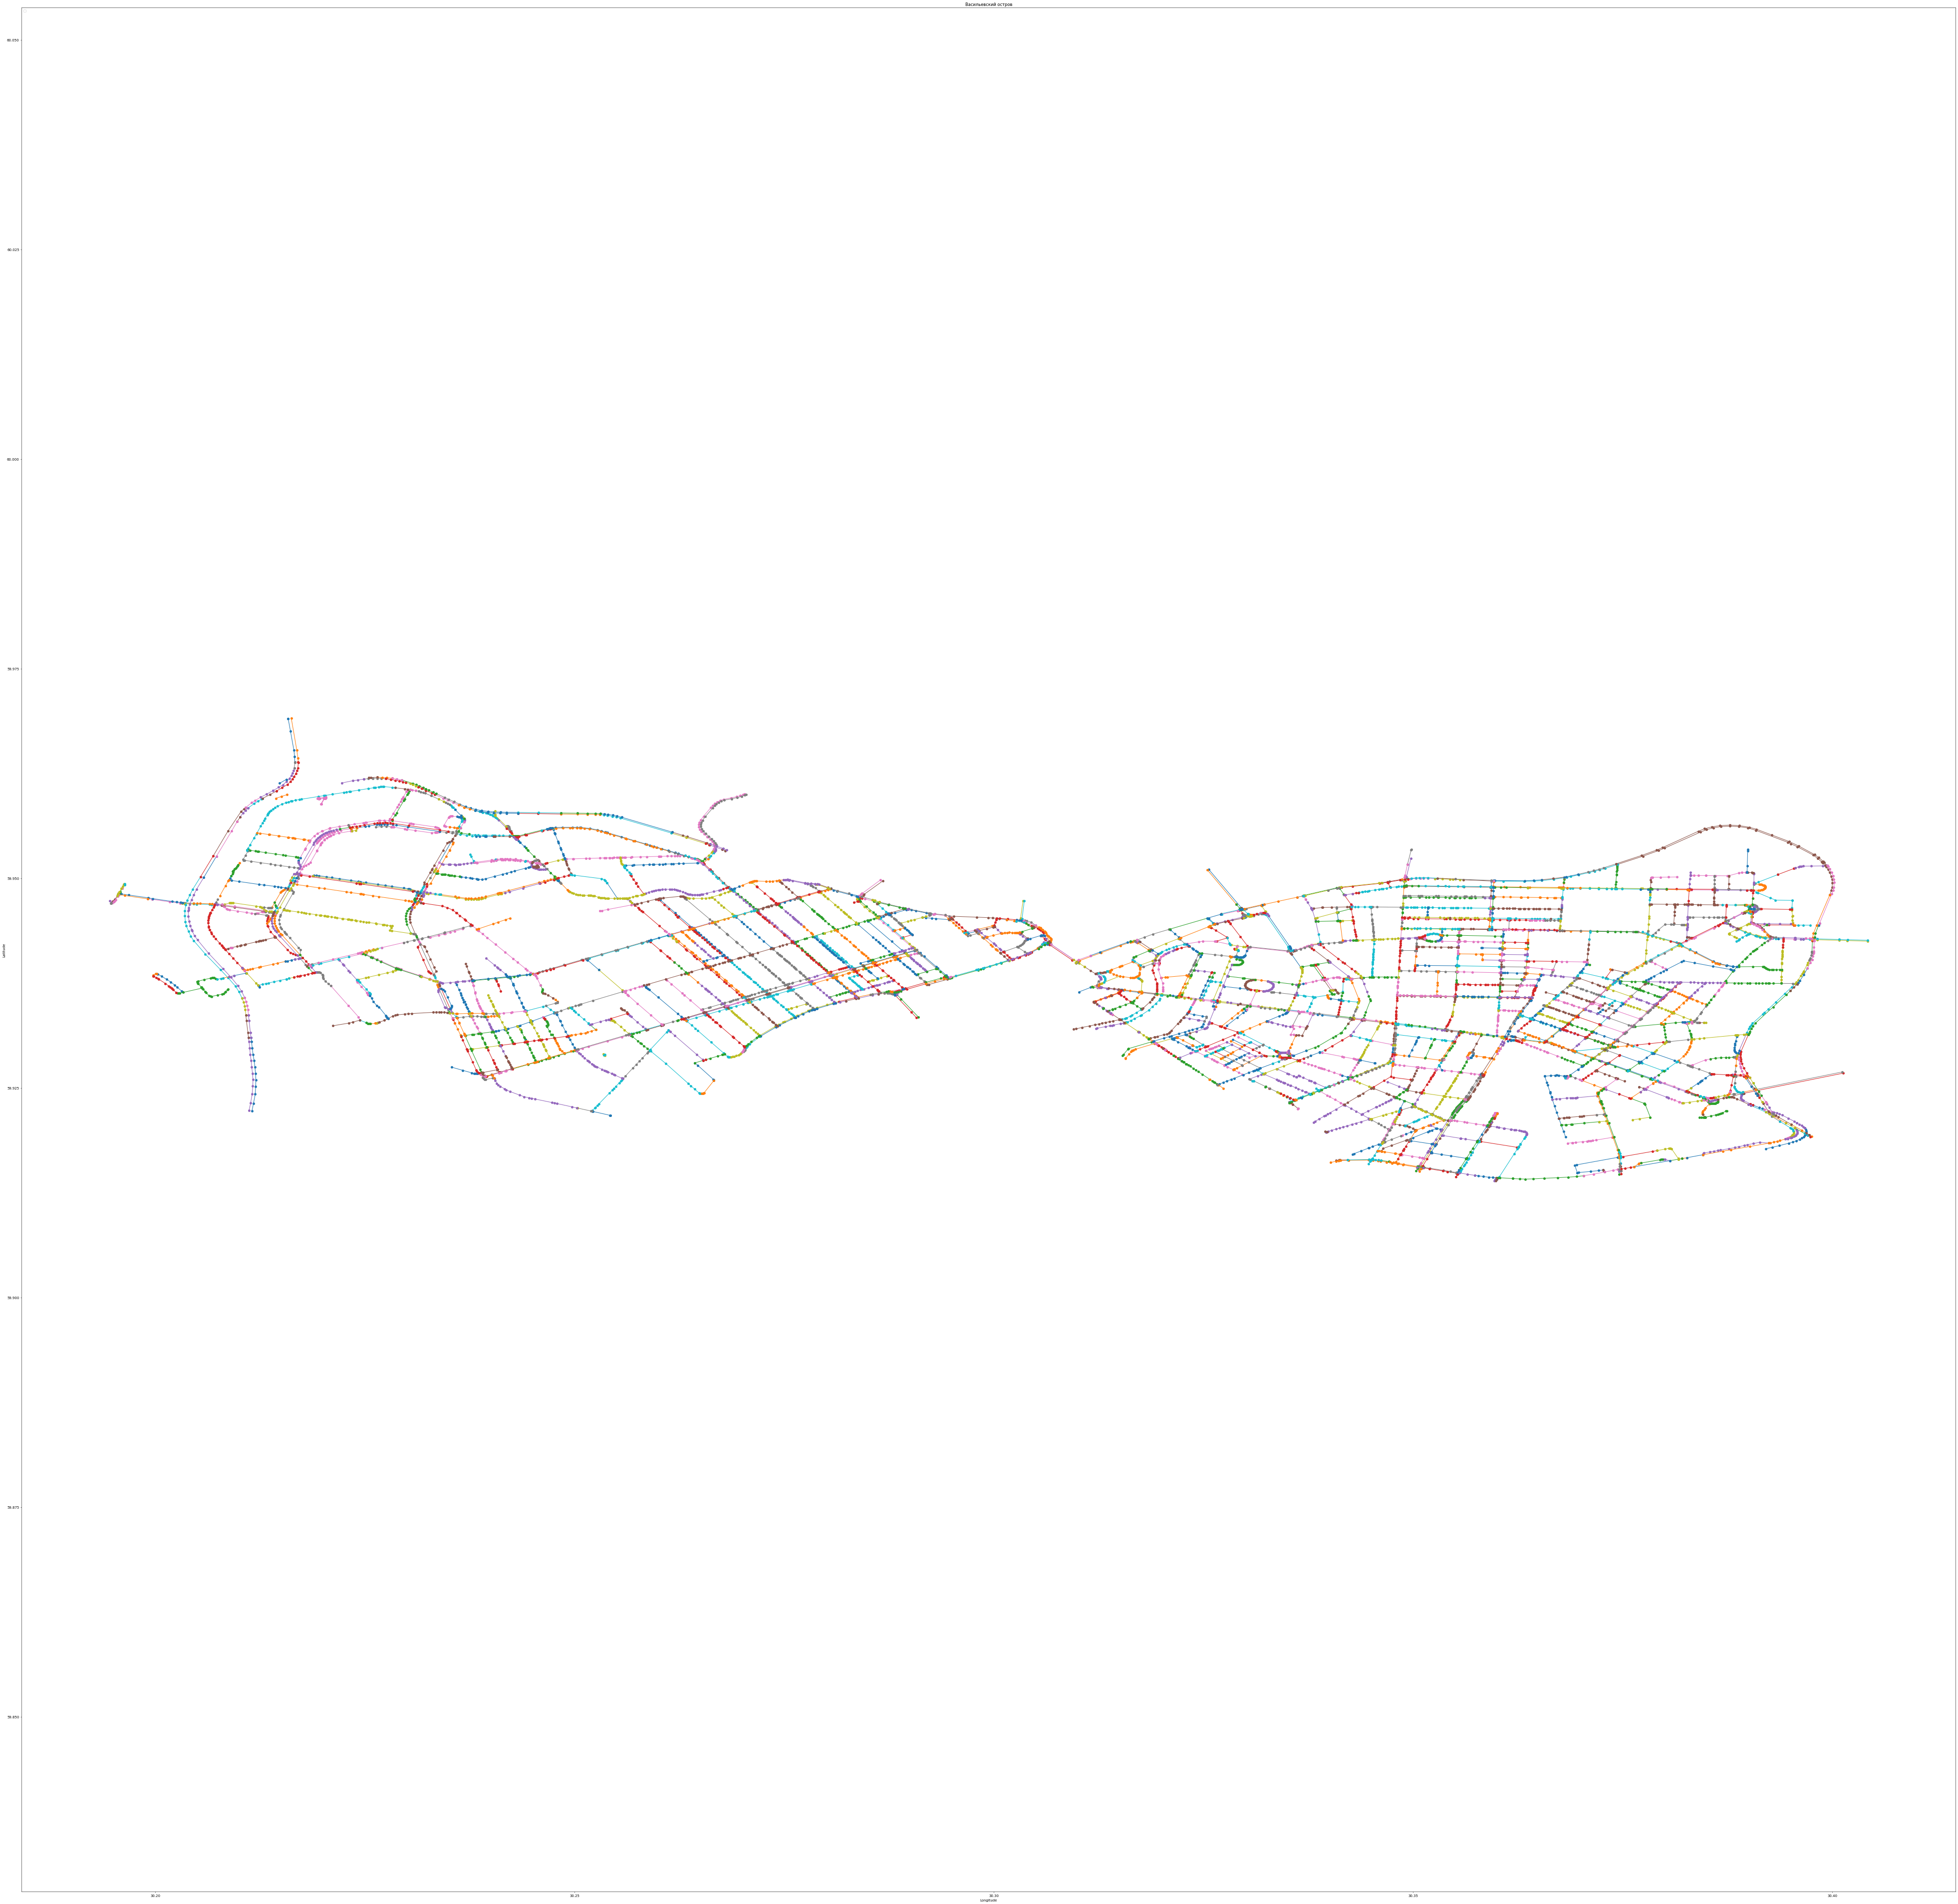

In [10]:
'''
import numpy as np
import matplotlib.pyplot as plt
coords = [[] for x in range(len(data['elements']))]
for i in range(len(data['elements'])):
    if 'geometry' in data['elements'][i]:
            for j in range(len(data['elements'][i]['geometry'])):
                lon = data['elements'][i]['geometry'][j]['lon']
                lat = data['elements'][i]['geometry'][j]['lat']
                coords[i].append((lon, lat))

X = np.array(coords[0])
plt.figure(num=None, figsize=(30, 30), dpi=50)
'''

X = np.array(coords[0])
plt.figure(num=None, figsize=(100, 100), dpi=50)

for k in range(len(data0['elements']) + len(data1['elements'])):
    X = np.array(coords[k])
    #if 'name' in data1['elements'][k]['tags'] or data0['elements'][k]['tags']:
    #    name = data['elements'][k]['tags']['name']
    #else:
    #    name = 'empty'
    if len(coords[k]) > 0:
        #plt.plot(X[:, 0], X[:, 1], '-o', label = name )
        plt.plot(X[:, 0], X[:, 1], '-o')


plt.title('Васильевский остров')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc = 'upper left')
plt.axis('equal')
plt.show()

In [90]:
def maxminCoords():
    allDistrict = ['centralnii_district.txt', 'petrogradskii_district.txt', 'kalininskii_district.txt', 'primorskii_district.txt', 'admiralteiskii_district.txt', 'nevskii_district.txt', 'kirovskii_district.txt', 'frunzenskii_district.txt', 'vyborgskii_district.txt', 'vasileostrovskii_district.txt','moskovskii_district.txt' ]
    d = {}
    import json
    for n in allDistrict:
        with open(n, 'r') as file:
            data = json.load(file)
        import numpy as np
        import matplotlib.pyplot as plt
        coords = [[] for x in range(len(data['elements']))]
        for i in range(len(data['elements'])):
            if 'geometry' in data['elements'][i]:
                    for j in range(len(data['elements'][i]['geometry'])):
                        lon = data['elements'][i]['geometry'][j]['lon']
                        lat = data['elements'][i]['geometry'][j]['lat']
                        coords[i].append((lon, lat))
        X = np.array(coords[0])
        flat_coords = [item for sublist in coords for item in sublist]
        maxlon = max(flat_coords, key=lambda x: x[0])[0]
        minlon = min(flat_coords, key=lambda x: x[0])[0]
        maxlat = max(flat_coords, key=lambda x: x[1])[1]
        minlat = min(flat_coords, key=lambda x: x[1])[1]

        d[n] = [maxlon, minlon, maxlat, minlat]
    return d

In [91]:
d = maxminCoords()

In [92]:
def findDistrict(begin, end):
    k = []
    for i in d:
        if begin[1] <= d[i][0] and begin[1] >= d[i][1] and begin[0] <= d[i][2] and begin[0] >= d[i][3]:
            k.append(i)
        if end[1] <= d[i][0] and end[1] >= d[i][1] and end[0] <= d[i][2] and end[0] >= d[i][3]:
            k.append(i)
        h = set(k)
    return h

In [93]:
begin = (59.932255, 30.251436)

In [94]:
end = (59.944153, 30.307066)

In [95]:
district = findDistrict(begin, end)

In [100]:
def unionCoords(district):
    coordsAll = []
    for i in district:
        import json
        with open(i, 'r') as file:
            data = json.load(file)
            import numpy as np
            import matplotlib.pyplot as plt
            coords = [[] for x in range(len(data['elements']))]
            for i in range(len(data['elements'])):
                if 'geometry' in data['elements'][i]:
                        for j in range(len(data['elements'][i]['geometry'])):
                            lon = data['elements'][i]['geometry'][j]['lon']
                            lat = data['elements'][i]['geometry'][j]['lat']
                            coords[i].append((lon, lat))

            coordsAll.extend(coords)
    return coordsAll

In [101]:
coordsAll = unionCoords(district)

No handles with labels found to put in legend.


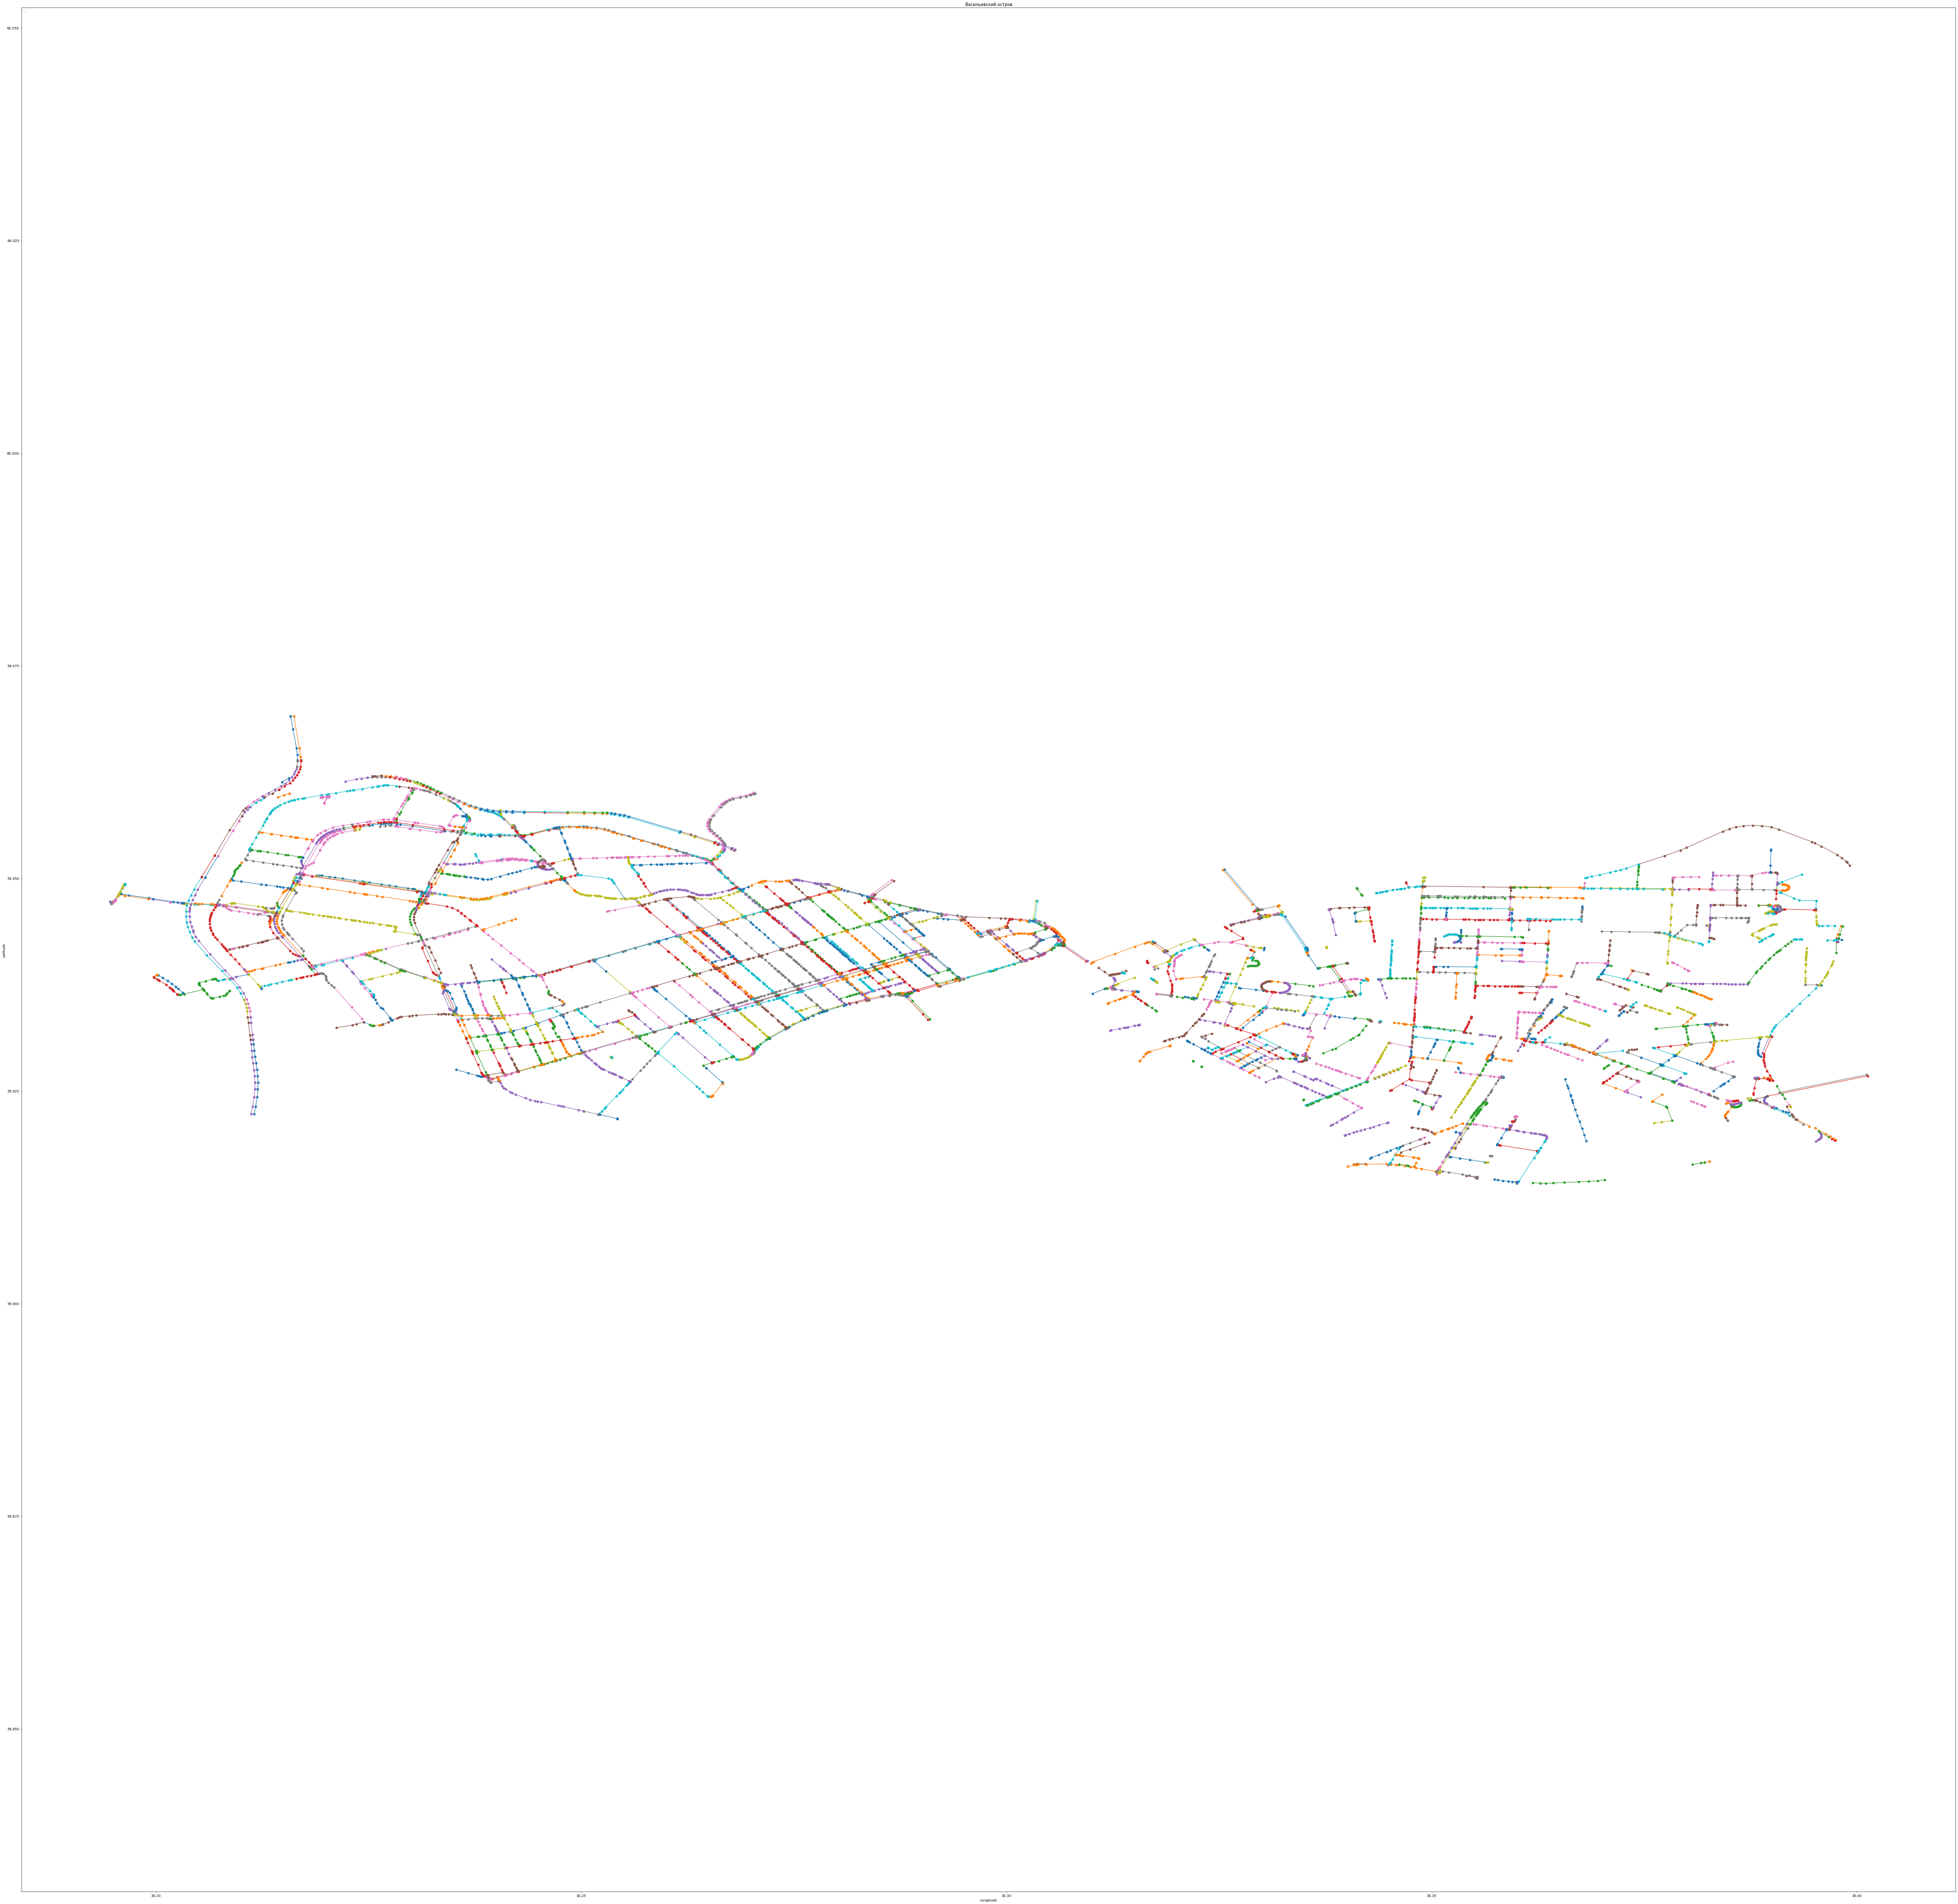

In [102]:
plt.figure(num=None, figsize=(100, 100), dpi=50)

for k in range(len(coords)):
    X = np.array(coordsAll[k])

    if len(coordsAll[k]) > 0:
        plt.plot(X[:, 0], X[:, 1], '-o')


plt.title('Васильевский остров')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc = 'upper left')
plt.axis('equal')
plt.show()